In [11]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

In [12]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [13]:
len(X_train)

60000

In [14]:
X_val=X_train[50000:]
Y_val=Y_train[50000:]
X_train=X_train[:50000]
Y_train=Y_train[:50000]

In [15]:
X_val
Y_val
X_train
Y_train

array([5, 0, 4, ..., 8, 4, 8], dtype=uint8)

In [16]:
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

In [17]:
train_rand_idxs = np.random.choice(50000,700)
val_rand_idxs = np.random.choice(10000,300)

In [19]:
# train_rand_idxs
np.random.choice(10,10) # defalut: 복원추출
np.random.choice(10,10,replace=False) # 비복원추출

array([4, 9, 1, 7, 3, 2, 6, 0, 5, 8])

In [20]:
X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

In [22]:
X_train.shape
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [23]:
# Y data one-hot-encoding
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test) 

In [41]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=20)

In [42]:
model=Sequential()
model.add(Dense(units=2 ,input_dim=28*28, activation='relu'))
model.add(Dense(units=10 ,activation='softmax'))

In [43]:
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
             metrics=['acc'])

In [44]:
hist = model.fit(X_train,Y_train,epochs = 500, batch_size = 10, validation_data=(X_val,Y_val), callbacks=es)

Epoch 1/500
70/70 [==============================] - 0s 4ms/step - loss: 2.2597 - acc: 0.1457 - val_loss: 2.2073 - val_acc: 0.1833
Epoch 2/500
70/70 [==============================] - 0s 2ms/step - loss: 2.1627 - acc: 0.1871 - val_loss: 2.1220 - val_acc: 0.2167
Epoch 3/500
70/70 [==============================] - 0s 2ms/step - loss: 2.0822 - acc: 0.2400 - val_loss: 2.0606 - val_acc: 0.2767
Epoch 4/500
70/70 [==============================] - 0s 2ms/step - loss: 2.0191 - acc: 0.2800 - val_loss: 1.9928 - val_acc: 0.3033
Epoch 5/500
70/70 [==============================] - 0s 2ms/step - loss: 1.9630 - acc: 0.2957 - val_loss: 1.9462 - val_acc: 0.2933
Epoch 6/500
70/70 [==============================] - 0s 2ms/step - loss: 1.9132 - acc: 0.3157 - val_loss: 1.8887 - val_acc: 0.3067
Epoch 7/500
70/70 [==============================] - 0s 3ms/step - loss: 1.8682 - acc: 0.3286 - val_loss: 1.8550 - val_acc: 0.3100
Epoch 8/500
70/70 [==============================] - 0s 3ms/step - loss: 1.8297 - a

70/70 [==============================] - 0s 2ms/step - loss: 1.2772 - acc: 0.5029 - val_loss: 1.4652 - val_acc: 0.4267
Epoch 64/500
70/70 [==============================] - 0s 2ms/step - loss: 1.2746 - acc: 0.5057 - val_loss: 1.4623 - val_acc: 0.4533
Epoch 65/500
70/70 [==============================] - 0s 2ms/step - loss: 1.2699 - acc: 0.5143 - val_loss: 1.4693 - val_acc: 0.4500
Epoch 66/500
70/70 [==============================] - 0s 2ms/step - loss: 1.2671 - acc: 0.5200 - val_loss: 1.4602 - val_acc: 0.4433
Epoch 67/500
70/70 [==============================] - 0s 2ms/step - loss: 1.2628 - acc: 0.5057 - val_loss: 1.4543 - val_acc: 0.4333
Epoch 68/500
70/70 [==============================] - 0s 1ms/step - loss: 1.2584 - acc: 0.5114 - val_loss: 1.4411 - val_acc: 0.4300
Epoch 69/500
70/70 [==============================] - 0s 1ms/step - loss: 1.2558 - acc: 0.5114 - val_loss: 1.4489 - val_acc: 0.4400
Epoch 70/500
70/70 [==============================] - 0s 1ms/step - loss: 1.2534 - acc: 0

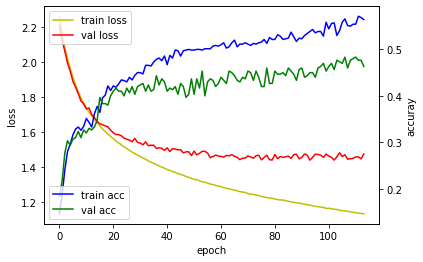

In [45]:
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [46]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuray : ' + str(loss_and_metrics[1]))

313/313 [==============================] - 1s 2ms/step - loss: 1.4511 - acc: 0.4437

loss : 1.4511463642120361
accuray : 0.44369998574256897


In [35]:
# EarlyStopping
# callback function: 사용자가 설정한 환경이 되었을때 시스템에 의해 자동으로 호출되는 함수
# monitor: 관찰항목(val loss, val acc)
# min_delta: 개선되고 있다고 판단하기 위한 최소 변화량
#            (변화량이 min_delta보다 작으면 개선이 안된 것으로 판단)
# patience: 개선이 없다고 해서 바로 종료하는 게 아니라 몇 epochs동안 참을 수 있니(10이면 epochs 10까지 참아줌.)
# mode: 개선이 없다고 판단하기 위한 기준,
#       ex) 관찰항목이 val_loss인 경우, 감소되는 것이 멈출때 트레이닝 종료. → mode = 'min'
#       ex) 관찰항목이 val_acc인 경우, mode = 'max'


In [47]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

# 1. 데이터셋 생성하기
# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터셋 전처리
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 훈련셋과 검증셋 분리
x_val = x_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
x_train = x_train[42000:]
y_val = y_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
y_train = y_train[42000:]

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
model.fit(x_train, y_train, epochs=5, batch_size=32,validation_data=(x_val,y_val))
          
# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

# 6. 모델 사용하기
xhat_idx = np.random.choice(x_test.shape[0], 5)
xhat = x_test[xhat_idx]

Epoch 1/5
563/563 [==============================] - 2s 4ms/step - loss: 1.0940 - accuracy: 0.7413 - val_loss: 0.6294 - val_accuracy: 0.8448
Epoch 2/5
563/563 [==============================] - 2s 4ms/step - loss: 0.5028 - accuracy: 0.8694 - val_loss: 0.4696 - val_accuracy: 0.8751
Epoch 3/5
563/563 [==============================] - 2s 4ms/step - loss: 0.4057 - accuracy: 0.8898 - val_loss: 0.4069 - val_accuracy: 0.8883
Epoch 4/5
563/563 [==============================] - 2s 3ms/step - loss: 0.3608 - accuracy: 0.8995 - val_loss: 0.3783 - val_accuracy: 0.8946
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3258 - accuracy: 0.9096

loss_and_metrics : [0.3257860243320465, 0.909600019454956]


In [48]:
from keras.models import load_model

In [49]:
# 모델 저장: weight, bias 저장됨!!(Param)
# pre-trained model은 이거와 동일함!!
model.save("mymnist.h5")

In [50]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_test = np_utils.to_categorical(y_test)
xhat_idx = np.random.choice(x_test.shape[0], 5)
xhat = x_test[xhat_idx]

In [51]:
from keras.models import load_model

In [53]:
loaded_model = load_model("mymnist.h5")

In [56]:
yhat = loaded_model.predict_classes(xhat)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


## RNN을 이용한 수열 생성

In [66]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, SimpleRNN
import numpy as np
from numpy import argmax

In [61]:
# [0.0,0.1,0.2,0.3] → 그 다음값은 뭘까? 0.4 예측

In [64]:
model = Sequential([SimpleRNN(units = 1,
                             activation = 'tanh',
                             return_sequences = False,
                             return_state = True)]) # 출력 1개

In [65]:
X = [] 
Y = [] 

for i in range(6): 
    lst = list(range(i,i+4)) 
    X.append(list(map(lambda c: [c/10], lst))) 
    Y.append((i+4)/10) 
X = np.array(X) 
Y = np.array(Y) 

print(X)  #6,4,1
print(Y)

[[[0. ]
  [0.1]
  [0.2]
  [0.3]]

 [[0.1]
  [0.2]
  [0.3]
  [0.4]]

 [[0.2]
  [0.3]
  [0.4]
  [0.5]]

 [[0.3]
  [0.4]
  [0.5]
  [0.6]]

 [[0.4]
  [0.5]
  [0.6]
  [0.7]]

 [[0.5]
  [0.6]
  [0.7]
  [0.8]]]
[0.4 0.5 0.6 0.7 0.8 0.9]


In [68]:
X.shape # 6건의 data, 4행 1열

(6, 4, 1)

In [99]:
model = Sequential([SimpleRNN(units = 30, # value in hidden layer: 10
                      return_sequences = False,
                      input_shape=[4,1]),
           Dense(1,)])

In [100]:
model.compile(optimizer='adam',loss = 'mse',) # 연속형 값 출력: mse

In [105]:
history = model.fit(X, Y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 0s/step - loss: 3.9266e-06
Epoch 2/1000
1/1 [==============================] - 0s 0s/step - loss: 3.9020e-06
Epoch 3/1000
1/1 [==============================] - 0s 0s/step - loss: 3.8773e-06
Epoch 4/1000
1/1 [==============================] - 0s 0s/step - loss: 3.8527e-06
Epoch 5/1000
1/1 [==============================] - 0s 0s/step - loss: 3.8283e-06
Epoch 6/1000
1/1 [==============================] - 0s 0s/step - loss: 3.8042e-06
Epoch 7/1000
1/1 [==============================] - 0s 0s/step - loss: 3.7801e-06
Epoch 8/1000
1/1 [==============================] - 0s 0s/step - loss: 3.7563e-06
Epoch 9/1000
1/1 [==============================] - 0s 0s/step - loss: 3.7324e-06
Epoch 10/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.7089e-06
Epoch 11/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.6855e-06
Epoch 12/1000
1/1 [==============================] - 0s 0s/step - loss: 3.6623e-06
Epoch 13/10

1/1 [==============================] - 0s 0s/step - loss: 2.1406e-06
Epoch 100/1000
1/1 [==============================] - 0s 0s/step - loss: 2.1280e-06
Epoch 101/1000
1/1 [==============================] - 0s 0s/step - loss: 2.1156e-06
Epoch 102/1000
1/1 [==============================] - 0s 1ms/step - loss: 2.1029e-06
Epoch 103/1000
1/1 [==============================] - 0s 0s/step - loss: 2.0908e-06
Epoch 104/1000
1/1 [==============================] - 0s 0s/step - loss: 2.0785e-06
Epoch 105/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.0664e-06
Epoch 106/1000
1/1 [==============================] - 0s 0s/step - loss: 2.0544e-06
Epoch 107/1000
1/1 [==============================] - 0s 0s/step - loss: 2.0423e-06
Epoch 108/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.0307e-06
Epoch 109/1000
1/1 [==============================] - 0s 0s/step - loss: 2.0187e-06
Epoch 110/1000
1/1 [==============================] - 0s 0s/step - loss: 2.0070e-06
Epoc

1/1 [==============================] - 0s 0s/step - loss: 1.2744e-06
Epoch 197/1000
1/1 [==============================] - 0s 0s/step - loss: 1.2684e-06
Epoch 198/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.2625e-06
Epoch 199/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.2568e-06
Epoch 200/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.2511e-06
Epoch 201/1000
1/1 [==============================] - 0s 0s/step - loss: 1.2453e-06
Epoch 202/1000
1/1 [==============================] - 0s 0s/step - loss: 1.2395e-06
Epoch 203/1000
1/1 [==============================] - 0s 0s/step - loss: 1.2340e-06
Epoch 204/1000
1/1 [==============================] - 0s 0s/step - loss: 1.2284e-06
Epoch 205/1000
1/1 [==============================] - 0s 0s/step - loss: 1.2229e-06
Epoch 206/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.2173e-06
Epoch 207/1000
1/1 [==============================] - 0s 0s/step - loss: 1.2120e-06
Epo

1/1 [==============================] - 0s 8ms/step - loss: 8.8050e-07
Epoch 294/1000
1/1 [==============================] - 0s 8ms/step - loss: 8.7781e-07
Epoch 295/1000
1/1 [==============================] - 0s 0s/step - loss: 8.7537e-07
Epoch 296/1000
1/1 [==============================] - 0s 0s/step - loss: 8.7283e-07
Epoch 297/1000
1/1 [==============================] - 0s 0s/step - loss: 8.7026e-07
Epoch 298/1000
1/1 [==============================] - 0s 8ms/step - loss: 8.6787e-07
Epoch 299/1000
1/1 [==============================] - 0s 0s/step - loss: 8.6526e-07
Epoch 300/1000
1/1 [==============================] - 0s 0s/step - loss: 8.6272e-07
Epoch 301/1000
1/1 [==============================] - 0s 0s/step - loss: 8.6033e-07
Epoch 302/1000
1/1 [==============================] - 0s 0s/step - loss: 8.5804e-07
Epoch 303/1000
1/1 [==============================] - 0s 0s/step - loss: 8.5556e-07
Epoch 304/1000
1/1 [==============================] - 0s 8ms/step - loss: 8.5325e-07
Epo

1/1 [==============================] - 0s 0s/step - loss: 7.1142e-07
Epoch 391/1000
1/1 [==============================] - 0s 8ms/step - loss: 7.1023e-07
Epoch 392/1000
1/1 [==============================] - 0s 0s/step - loss: 7.0916e-07
Epoch 393/1000
1/1 [==============================] - 0s 0s/step - loss: 7.0796e-07
Epoch 394/1000
1/1 [==============================] - 0s 0s/step - loss: 7.0694e-07
Epoch 395/1000
1/1 [==============================] - 0s 0s/step - loss: 7.0593e-07
Epoch 396/1000
1/1 [==============================] - 0s 8ms/step - loss: 7.0491e-07
Epoch 397/1000
1/1 [==============================] - 0s 8ms/step - loss: 7.0384e-07
Epoch 398/1000
1/1 [==============================] - 0s 0s/step - loss: 7.0282e-07
Epoch 399/1000
1/1 [==============================] - 0s 0s/step - loss: 7.0183e-07
Epoch 400/1000
1/1 [==============================] - 0s 0s/step - loss: 7.0071e-07
Epoch 401/1000
1/1 [==============================] - 0s 8ms/step - loss: 6.9979e-07
Epo

1/1 [==============================] - 0s 0s/step - loss: 6.3899e-07
Epoch 488/1000
1/1 [==============================] - 0s 0s/step - loss: 6.3851e-07
Epoch 489/1000
1/1 [==============================] - 0s 0s/step - loss: 6.3810e-07
Epoch 490/1000
1/1 [==============================] - 0s 0s/step - loss: 6.3758e-07
Epoch 491/1000
1/1 [==============================] - 0s 0s/step - loss: 6.3705e-07
Epoch 492/1000
1/1 [==============================] - 0s 0s/step - loss: 6.3665e-07
Epoch 493/1000
1/1 [==============================] - 0s 0s/step - loss: 6.3615e-07
Epoch 494/1000
1/1 [==============================] - 0s 9ms/step - loss: 6.3575e-07
Epoch 495/1000
1/1 [==============================] - 0s 0s/step - loss: 6.3518e-07
Epoch 496/1000
1/1 [==============================] - 0s 0s/step - loss: 6.3475e-07
Epoch 497/1000
1/1 [==============================] - 0s 9ms/step - loss: 6.3430e-07
Epoch 498/1000
1/1 [==============================] - 0s 0s/step - loss: 6.3385e-07
Epoch

1/1 [==============================] - 0s 0s/step - loss: 6.0462e-07
Epoch 585/1000
1/1 [==============================] - 0s 468us/step - loss: 6.0443e-07
Epoch 586/1000
1/1 [==============================] - 0s 0s/step - loss: 6.0403e-07
Epoch 587/1000
1/1 [==============================] - 0s 0s/step - loss: 6.0383e-07
Epoch 588/1000
1/1 [==============================] - 0s 0s/step - loss: 6.0355e-07
Epoch 589/1000
1/1 [==============================] - 0s 0s/step - loss: 6.0330e-07
Epoch 590/1000
1/1 [==============================] - 0s 8ms/step - loss: 6.0307e-07
Epoch 591/1000
1/1 [==============================] - 0s 0s/step - loss: 6.0278e-07
Epoch 592/1000
1/1 [==============================] - 0s 656us/step - loss: 6.0260e-07
Epoch 593/1000
1/1 [==============================] - 0s 0s/step - loss: 6.0238e-07
Epoch 594/1000
1/1 [==============================] - 0s 0s/step - loss: 6.0206e-07
Epoch 595/1000
1/1 [==============================] - 0s 8ms/step - loss: 6.0187e-07

1/1 [==============================] - 0s 0s/step - loss: 5.8362e-07
Epoch 682/1000
1/1 [==============================] - 0s 8ms/step - loss: 5.8345e-07
Epoch 683/1000
1/1 [==============================] - 0s 0s/step - loss: 5.8317e-07
Epoch 684/1000
1/1 [==============================] - 0s 0s/step - loss: 5.8303e-07
Epoch 685/1000
1/1 [==============================] - 0s 0s/step - loss: 5.8285e-07
Epoch 686/1000
1/1 [==============================] - 0s 0s/step - loss: 5.8276e-07
Epoch 687/1000
1/1 [==============================] - 0s 8ms/step - loss: 5.8252e-07
Epoch 688/1000
1/1 [==============================] - 0s 0s/step - loss: 5.8231e-07
Epoch 689/1000
1/1 [==============================] - 0s 0s/step - loss: 5.8216e-07
Epoch 690/1000
1/1 [==============================] - 0s 0s/step - loss: 5.8198e-07
Epoch 691/1000
1/1 [==============================] - 0s 0s/step - loss: 5.8182e-07
Epoch 692/1000
1/1 [==============================] - 0s 0s/step - loss: 5.8161e-07
Epoch

1/1 [==============================] - 0s 0s/step - loss: 5.6691e-07
Epoch 779/1000
1/1 [==============================] - 0s 0s/step - loss: 5.6667e-07
Epoch 780/1000
1/1 [==============================] - 0s 0s/step - loss: 5.6650e-07
Epoch 781/1000
1/1 [==============================] - 0s 8ms/step - loss: 5.6630e-07
Epoch 782/1000
1/1 [==============================] - 0s 0s/step - loss: 5.6617e-07
Epoch 783/1000
1/1 [==============================] - 0s 0s/step - loss: 5.6604e-07
Epoch 784/1000
1/1 [==============================] - 0s 8ms/step - loss: 5.6579e-07
Epoch 785/1000
1/1 [==============================] - 0s 0s/step - loss: 5.6566e-07
Epoch 786/1000
1/1 [==============================] - 0s 0s/step - loss: 5.6546e-07
Epoch 787/1000
1/1 [==============================] - 0s 0s/step - loss: 5.6539e-07
Epoch 788/1000
1/1 [==============================] - 0s 0s/step - loss: 5.6518e-07
Epoch 789/1000
1/1 [==============================] - 0s 0s/step - loss: 5.6502e-07
Epoch

1/1 [==============================] - 0s 0s/step - loss: 5.5111e-07
Epoch 876/1000
1/1 [==============================] - 0s 0s/step - loss: 5.5093e-07
Epoch 877/1000
1/1 [==============================] - 0s 0s/step - loss: 5.5066e-07
Epoch 878/1000
1/1 [==============================] - 0s 0s/step - loss: 5.5055e-07
Epoch 879/1000
1/1 [==============================] - 0s 0s/step - loss: 5.5042e-07
Epoch 880/1000
1/1 [==============================] - 0s 8ms/step - loss: 5.5030e-07
Epoch 881/1000
1/1 [==============================] - 0s 0s/step - loss: 5.5021e-07
Epoch 882/1000
1/1 [==============================] - 0s 0s/step - loss: 5.4996e-07
Epoch 883/1000
1/1 [==============================] - 0s 0s/step - loss: 5.4987e-07
Epoch 884/1000
1/1 [==============================] - 0s 0s/step - loss: 5.4966e-07
Epoch 885/1000
1/1 [==============================] - 0s 8ms/step - loss: 5.4951e-07
Epoch 886/1000
1/1 [==============================] - 0s 0s/step - loss: 5.4934e-07
Epoch

1/1 [==============================] - 0s 0s/step - loss: 5.3557e-07
Epoch 973/1000
1/1 [==============================] - 0s 0s/step - loss: 5.3532e-07
Epoch 974/1000
1/1 [==============================] - 0s 0s/step - loss: 5.3523e-07
Epoch 975/1000
1/1 [==============================] - 0s 0s/step - loss: 5.3505e-07
Epoch 976/1000
1/1 [==============================] - 0s 0s/step - loss: 5.3487e-07
Epoch 977/1000
1/1 [==============================] - 0s 0s/step - loss: 5.3463e-07
Epoch 978/1000
1/1 [==============================] - 0s 0s/step - loss: 5.3457e-07
Epoch 979/1000
1/1 [==============================] - 0s 0s/step - loss: 5.3435e-07
Epoch 980/1000
1/1 [==============================] - 0s 0s/step - loss: 5.3427e-07
Epoch 981/1000
1/1 [==============================] - 0s 8ms/step - loss: 5.3403e-07
Epoch 982/1000
1/1 [==============================] - 0s 5ms/step - loss: 5.3384e-07
Epoch 983/1000
1/1 [==============================] - 0s 0s/step - loss: 5.3372e-07
Epoch

In [106]:
model.predict(X)

array([[0.4004906 ],
       [0.4993631 ],
       [0.59938747],
       [0.7004861 ],
       [0.80111015],
       [0.8991665 ]], dtype=float32)

In [107]:
model.predict(np.array([[[0.6],[0.7],[0.8],[0.9]]]))

array([[0.9927621]], dtype=float32)

## RNN 기반 문장 생성

In [108]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from keras.utils import to_categorical

text="""인공지능을 공부하면서 코딩을 하고 있다\n
파이썬 코딩을 배우고 익혔다\n
딥러닝을 배우고 코딩을 하고 있다\n
파이썬 기반에서 판다스를 배우고 코딩을 했다\n"""

In [109]:
t=Tokenizer()

In [110]:
print(text)
t.fit_on_texts([text])

인공지능을 공부하면서 코딩을 하고 있다

파이썬 코딩을 배우고 익혔다

딥러닝을 배우고 코딩을 하고 있다

파이썬 기반에서 판다스를 배우고 코딩을 했다



In [111]:
[text]

['인공지능을 공부하면서 코딩을 하고 있다\n\n파이썬 코딩을 배우고 익혔다\n\n딥러닝을 배우고 코딩을 하고 있다\n\n파이썬 기반에서 판다스를 배우고 코딩을 했다\n']

In [112]:
t.word_index

{'코딩을': 1,
 '배우고': 2,
 '하고': 3,
 '있다': 4,
 '파이썬': 5,
 '인공지능을': 6,
 '공부하면서': 7,
 '익혔다': 8,
 '딥러닝을': 9,
 '기반에서': 10,
 '판다스를': 11,
 '했다': 12}

In [113]:
t.index_word

{1: '코딩을',
 2: '배우고',
 3: '하고',
 4: '있다',
 5: '파이썬',
 6: '인공지능을',
 7: '공부하면서',
 8: '익혔다',
 9: '딥러닝을',
 10: '기반에서',
 11: '판다스를',
 12: '했다'}

In [115]:
t.word_counts

OrderedDict([('인공지능을', 1),
             ('공부하면서', 1),
             ('코딩을', 4),
             ('하고', 2),
             ('있다', 2),
             ('파이썬', 2),
             ('배우고', 3),
             ('익혔다', 1),
             ('딥러닝을', 1),
             ('기반에서', 1),
             ('판다스를', 1),
             ('했다', 1)])

In [116]:
vocab_size = len(t.word_index)+1
# 실제 단어는 12개, index는 0번부터 11번까지. +1을 해서 0~13까지 쓰겠다.

In [118]:
print("단어 크기 : ",vocab_size)

단어 크기 :  13


In [119]:
sequences = list()
for line in text.split('\n'): 
    encoded = t.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

In [120]:
sequences # 마지막 숫자가 y data! 나머지는 다 x data

[[6, 7],
 [6, 7, 1],
 [6, 7, 1, 3],
 [6, 7, 1, 3, 4],
 [5, 1],
 [5, 1, 2],
 [5, 1, 2, 8],
 [9, 2],
 [9, 2, 1],
 [9, 2, 1, 3],
 [9, 2, 1, 3, 4],
 [5, 10],
 [5, 10, 11],
 [5, 10, 11, 2],
 [5, 10, 11, 2, 1],
 [5, 10, 11, 2, 1, 12]]

In [121]:
len(sequences)

16

In [127]:
max_len = max(len(i) for i in sequences)

In [132]:
sequences = pad_sequences(sequences, maxlen = max_len, padding='pre')

In [133]:
X = sequences[:,:-1]
Y = sequences[:,-1]

In [134]:
y = to_categorical(Y, num_classes=vocab_size) # 0번 제외, 1번~12번까지 사용

In [135]:
y

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],
      dtype=float32)

In [136]:
X.shape

(16, 5)

In [137]:
y.shape

(16, 13)

In [ ]:
# 단어 갯수가 많으면 word2vec → 차원축소
# 파이썬: [0000000...0000] : 1만 차원
# keras에 Embedding → 저차원 공간에 단어 표시! 1만차원 → 5차원도 가능!

In [139]:
model = Sequential(Embedding(vocab_size,10,input_length=max_len-1)) # 13차원 → 10차원으로 embedding
model.add(SimpleRNN(32)) # 출력 dim
model.add(Dense(vocab_size,activation='softmax'))

In [141]:
model.compile(loss = 'categorical_crossentropy', 
             optimizer='adam',
             metrics='acc')
model.fit(X,y,epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 0s/step - loss: 0.3383 - acc: 0.8750
Epoch 2/200
1/1 [==============================] - 0s 8ms/step - loss: 0.3339 - acc: 0.8750
Epoch 3/200
1/1 [==============================] - 0s 0s/step - loss: 0.3295 - acc: 0.8750
Epoch 4/200
1/1 [==============================] - 0s 0s/step - loss: 0.3253 - acc: 0.8750
Epoch 5/200
1/1 [==============================] - 0s 0s/step - loss: 0.3212 - acc: 0.8750
Epoch 6/200
1/1 [==============================] - 0s 0s/step - loss: 0.3172 - acc: 0.8750
Epoch 7/200
1/1 [==============================] - 0s 0s/step - loss: 0.3133 - acc: 0.8750
Epoch 8/200
1/1 [==============================] - 0s 0s/step - loss: 0.3095 - acc: 0.8750
Epoch 9/200
1/1 [==============================] - 0s 0s/step - loss: 0.3057 - acc: 0.8750
Epoch 10/200
1/1 [==============================] - 0s 0s/step - loss: 0.3021 - acc: 0.8750
Epoch 11/200
1/1 [==============================] - 0s 0s/step - loss: 0.2985 - acc: 0.8

Epoch 90/200
1/1 [==============================] - 0s 0s/step - loss: 0.1537 - acc: 0.9375
Epoch 91/200
1/1 [==============================] - 0s 0s/step - loss: 0.1526 - acc: 0.9375
Epoch 92/200
1/1 [==============================] - 0s 0s/step - loss: 0.1516 - acc: 0.9375
Epoch 93/200
1/1 [==============================] - 0s 0s/step - loss: 0.1506 - acc: 0.9375
Epoch 94/200
1/1 [==============================] - 0s 0s/step - loss: 0.1495 - acc: 0.9375
Epoch 95/200
1/1 [==============================] - 0s 0s/step - loss: 0.1485 - acc: 0.9375
Epoch 96/200
1/1 [==============================] - 0s 0s/step - loss: 0.1475 - acc: 0.9375
Epoch 97/200
1/1 [==============================] - 0s 0s/step - loss: 0.1465 - acc: 0.9375
Epoch 98/200
1/1 [==============================] - 0s 0s/step - loss: 0.1455 - acc: 0.9375
Epoch 99/200
1/1 [==============================] - 0s 0s/step - loss: 0.1445 - acc: 0.9375
Epoch 100/200
1/1 [==============================] - 0s 1ms/step - loss: 0.1436 

Epoch 178/200
1/1 [==============================] - 0s 0s/step - loss: 0.1023 - acc: 0.9375
Epoch 179/200
1/1 [==============================] - 0s 0s/step - loss: 0.1021 - acc: 0.9375
Epoch 180/200
1/1 [==============================] - 0s 0s/step - loss: 0.1019 - acc: 0.9375
Epoch 181/200
1/1 [==============================] - 0s 618us/step - loss: 0.1017 - acc: 0.9375
Epoch 182/200
1/1 [==============================] - 0s 0s/step - loss: 0.1015 - acc: 0.9375
Epoch 183/200
1/1 [==============================] - 0s 0s/step - loss: 0.1013 - acc: 0.9375
Epoch 184/200
1/1 [==============================] - 0s 0s/step - loss: 0.1011 - acc: 0.9375
Epoch 185/200
1/1 [==============================] - 0s 8ms/step - loss: 0.1009 - acc: 0.9375
Epoch 186/200
1/1 [==============================] - 0s 0s/step - loss: 0.1007 - acc: 0.9375
Epoch 187/200
1/1 [==============================] - 0s 0s/step - loss: 0.1005 - acc: 0.9375
Epoch 188/200
1/1 [==============================] - 0s 0s/step - 

In [147]:
t.word_index
print(t.texts_to_sequences([['인공지능을','공부하면서']])[0])

[6, 7]


In [150]:
pad_sequences([[6]],maxlen=5,padding='pre')

array([[0, 0, 0, 0, 6]])

In [157]:
def sentence_generation(model, tokenizer, current_word, n):
    init_word=current_word # 문장의 시작단어 저장: '인공지능을
    sentence = ''
    for _ in range(n): # n번 반복
        encoded = t.texts_to_sequences([current_word])[0] # 단어('인공지능을')의 인덱스
        encoded = pad_sequences([encoded],maxlen=5,padding='pre') # array([[0,0,0,0,6]]) 패딩
        result = model.predict_classes(encoded)
        # 입력단어: encoded, 예측단어: result
        for word, index in t.word_index.items():
            if index == result:
                break
        current_word = current_word + " " + word
        sentence = sentence + " " + word
    sentence = init_word+sentence
                
    return sentence

In [160]:
print(sentence_generation(model,t,'파이썬',5))

파이썬 코딩을 배우고 익혔다 하고 있다
